In [2]:
import iofunctions as iof
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

mergedSpineDFMetaComplete = pd.read_excel('output/mergedSpineDFMetaComplete.xlsx','Sheet1')

In [3]:
#l5
apicalCKO = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()
apicalWT = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()

basalCKO = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()
basalWT = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]['2D Spine Density 1/um'].drop_duplicates()

#l3
apicalCKOl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()
apicalWTl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()

basalCKOl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="CKO") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()
basalWTl3 = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.Genotype=="WT") & (mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l3")]['2D Spine Density 1/um'].drop_duplicates()

In [4]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from scipy.special import stdtr

print("Apical Dendrites on l5===============")
t, p = ttest_ind(apicalCKO, apicalWT, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(apicalCKO, apicalWT)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

print("Basal Dendrites on l5================")
t, p = ttest_ind(basalCKO, basalWT, equal_var=False)
print("Two-sample t-test:                        t = %g  p = %g" % (t, p))
u, p_value = mannwhitneyu(basalCKO, basalWT)
print("Two-sample Wilcoxon Mann Whitney test,    p=", p_value)

Apical Dendrites on l5===============
Two-sample t-test:                        t = -5.13762  p = 1.06513e-06
Two-sample Wilcoxon Mann Whitney test,    p= 3.15896011998e-06
Basal Dendrites on l5================
Two-sample t-test:                        t = -4.26078  p = 4.372e-05
Two-sample Wilcoxon Mann Whitney test,    p= 5.23678296759e-07


In [5]:
print("WT Apical===============")
print(apicalWT.describe())
print("CKO Apical==============")
print(apicalCKO.describe())

print("WT Basal===============")
print(basalWT.describe())
print("CKO Basal==============")
print(basalCKO.describe())

WT Apical===============
count    103.000000
mean       0.453472
std        0.124546
min        0.243126
25%        0.361633
50%        0.425973
75%        0.529505
max        0.801723
Name: 2D Spine Density 1/um, dtype: float64
CKO Apical==============
count    52.000000
mean      0.357452
std       0.101649
min       0.178879
25%       0.286610
50%       0.341836
75%       0.423054
max       0.628959
Name: 2D Spine Density 1/um, dtype: float64
WT Basal===============
count    71.000000
mean      0.383170
std       0.114646
min       0.172748
25%       0.287840
50%       0.365929
75%       0.469171
max       0.704303
Name: 2D Spine Density 1/um, dtype: float64
CKO Basal==============
count    56.000000
mean      0.286865
std       0.135063
min       0.067741
25%       0.211596
50%       0.251255
75%       0.326263
max       0.831316
Name: 2D Spine Density 1/um, dtype: float64


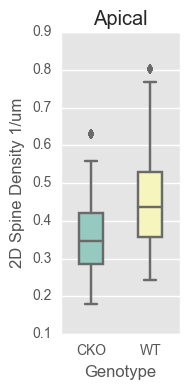

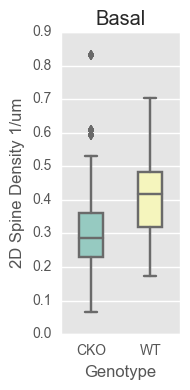

In [6]:
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

mergedSpineDFMetaCompleteApical = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()
plt.figure(figsize=(2, 4))
plt.title("Apical")
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaCompleteApical, palette="Set3", width=0.4)
plt.savefig('apical-2D Spine DensityComplete.png')


mergedSpineDFMetaCompleteBasal = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()
plt.figure(figsize=(2, 4))
plt.title("Basal")
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaCompleteBasal, palette="Set3", width=0.4)
plt.savefig('basal-2D Spine DensityComplete.png')